En este archivo puedes escribir lo que estimes conveniente. Te recomendamos detallar tu solución y todas las suposiciones que estás considerando. Aquí puedes ejecutar las funciones que definiste en los otros archivos de la carpeta src, medir el tiempo, memoria, etc.

In [1]:
file_path = "../resources/farmers-protest-tweets-2021-2-4.json"
import matplotlib.pyplot as plt
import memory_profiler
from cProfile import Profile
from pstats import Stats, SortKey

def plot(x_values, y_values, x_label, y_label, title=''):
    plt.plot(x_values, y_values, marker='o')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    plt.show()

For the first exercise q1_memory,  I've implemented two approaches.  <b>Lets</b> run them in two different cells and decide what is the best
1. For the first one
- Get a list with all tuples (date, username)
- Get top 10 of posted dates
- Get top 1 user who posted in each day

In [ ]:
from q1_memory import q1_memory
%load_ext memory_profiler
%mprun -f q1_memory q1_memory(file_path)

In [ ]:
from q1_memory import q1_memory
memory_usage = memory_profiler.memory_usage((q1_memory, (), {'file_path': file_path}))
x_values = list(range(1, len(memory_usage) + 1))  
# Plot the memory usage over time
plot(x_values, memory_usage, 'Time' ,'Memory usage (MiB)', 'Memory Usage Over Time')

2. Second Approach:
- Retrieve the top 10 dates.
- Filter users who posted on those days.
- For each day, identify the top user who posted on that day.
Based on the results, this approach proves superior as it exclusively fetches the required dates while disregarding the remainder. 

In [ ]:
from q1_memory import q1_memory_v2
%load_ext memory_profiler
%mprun -f q1_memory_v2 q1_memory_v2(file_path)

In [ ]:
from q1_memory import q1_memory_v2
memory_usage = memory_profiler.memory_usage((q1_memory_v2, (), {'file_path': file_path}))
x_values = list(range(1, len(memory_usage) + 1))  
# Plot the memory usage over time
plot(x_values, memory_usage, 'Time' ,'Memory usage (MiB)', 'Memory Usage Over Time')

Exercise 1 q1_time: This time, I've opted to utilize Pandas due to its utilization of NumPy under the hood. The NumPy library, partially written in C, significantly enhances performance compared to native Python, often by orders of magnitude.
The following cell employs cProfile and pstats to execute q1_time and measure its execution time. I've chosen to display only the 15 functions with the longest execution times.

In [ ]:
from q1_time import q1_time

with Profile() as profile:
    q1_time(file_path)
    (
     Stats(profile)
     .strip_dirs()
     .sort_stats(SortKey.TIME)
     .print_stats(15)
    )

Exercise 2: 
Memory problem: To solve this exercise I've decided to use to external libraries emoji and regex. The last allows to find grapheme clusters occurrences

In [ ]:
from q2_memory import q2_memory
%reload_ext memory_profiler
%mprun -f q2_memory q2_memory(file_path)

In [ ]:
from q2_memory import q2_memory
memory_usage = memory_profiler.memory_usage((q2_memory, (), {'file_path': file_path}))
x_values = list(range(1, len(memory_usage) + 1))  
# Plot the memory usage over time
plot(x_values, memory_usage, 'Time' ,'Memory usage (MiB)', 'Memory Usage Over Time')

Exercise 2: Time problem. 

Let see which approach is faster to load the file


In [5]:
import pandas as pd
with Profile() as profile:
    df = pd.read_json(file_path, lines=True)
    print(df.head())
    (
     Stats(profile)
     .strip_dirs()
     .sort_stats(SortKey.TIME)
     .print_stats(15)
    )

                                                 url  \
0  https://twitter.com/ArjunSinghPanam/status/136...   
1  https://twitter.com/PrdeepNain/status/13645062...   
2  https://twitter.com/parmarmaninder/status/1364...   
3  https://twitter.com/anmoldhaliwal/status/13645...   
4  https://twitter.com/KotiaPreet/status/13645061...   

                       date  \
0 2021-02-24 09:23:35+00:00   
1 2021-02-24 09:23:32+00:00   
2 2021-02-24 09:23:22+00:00   
3 2021-02-24 09:23:16+00:00   
4 2021-02-24 09:23:10+00:00   

                                             content  \
0  The world progresses while the Indian police a...   
1  #FarmersProtest \n#ModiIgnoringFarmersDeaths \...   
2  ਪੈਟਰੋਲ ਦੀਆਂ ਕੀਮਤਾਂ ਨੂੰ ਮੱਦੇਨਜ਼ਰ ਰੱਖਦੇ ਹੋਏ \nਮੇ...   
3  @ReallySwara @rohini_sgh watch full video here...   
4  #KisanEktaMorcha #FarmersProtest #NoFarmersNoF...   

                                     renderedContent                   id  \
0  The world progresses while the Indian police a...  13645062

Now let use readlines to process the file with native Python

In [7]:
import json

with Profile() as profile:
    file = open(file_path, 'r')
    data = json.loads(f"[{','.join(file.readlines())}]")
    (
     Stats(profile)
     .strip_dirs()
     .sort_stats(SortKey.TIME)
     .print_stats(15)
    )

         133987 function calls in 5.135 seconds

   Ordered by: internal time
   List reduced from 29 to 15 due to restriction <15>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    4.067    4.067    4.097    4.097 decoder.py:343(raw_decode)
        1    0.741    0.741    0.856    0.856 {method 'readlines' of '_io._IOBase' objects}
        1    0.181    0.181    0.181    0.181 {method 'join' of 'str' objects}
    49772    0.080    0.000    0.080    0.000 {built-in method _codecs.utf_8_decode}
    49772    0.035    0.000    0.115    0.000 codecs.py:319(decode)
     3278    0.011    0.000    0.030    0.000 ipkernel.py:775(_clean_thread_parent_frames)
     1639    0.007    0.000    0.008    0.000 threading.py:1478(enumerate)
     1639    0.006    0.000    0.010    0.000 ipkernel.py:790(<setcomp>)
    13112    0.004    0.000    0.004    0.000 threading.py:1145(ident)
        1    0.001    0.001    0.001    0.001 {built-in method io.open}
     6556    0.0

As a conclusion for the file load time there is no difference

A first approach that I've tried to use was with Pandas. But this solution is suboptimal compared with the implemented in q2_time similar to q2_memory but loading the complete file instead to use generator

In [3]:
from q2_time import q2_time_v2

with Profile() as profile:
    q2_time_v2(file_path)
    (
     Stats(profile)
     .strip_dirs()
     .sort_stats(SortKey.TIME)
     .print_stats(15)
    )


         19600715 function calls (19599781 primitive calls) in 19.788 seconds

   Ordered by: internal time
   List reduced from 1030 to 15 due to restriction <15>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    4.638    4.638    4.673    4.673 {built-in method pandas._libs.json.ujson_loads}
   117407    4.257    0.000    4.257    0.000 {method 'findall' of '_regex.Pattern' objects}
   117407    2.760    0.000    5.088    0.000 q2_time.py:32(<listcomp>)
 16364431    2.329    0.000    2.329    0.000 core.py:316(is_emoji)
   117407    0.599    0.000    0.603    0.000 regex.py:476(<setcomp>)
        1    0.488    0.488    0.732    0.732 {method 'read' of '_io.TextIOWrapper' objects}
       22    0.396    0.018    0.396    0.018 {method 'split' of 'str' objects}
   117407    0.347    0.000    1.785    0.000 regex.py:449(_compile)
   234830    0.268    0.000    0.624    0.000 enum.py:986(__and__)
        1    0.247    0.247    0.663    0.663 _json.py:97

This solution improves the execution time compared with the use of pandas

In [ ]:
from q2_time import q2_time

with Profile() as profile:
    q2_time(file_path)
    (
     Stats(profile)
     .strip_dirs()
     .sort_stats(SortKey.TIME)
     .print_stats(15)
    )

Exercise 3: Top 10 influencer users. I'll use the library jsonpath-ng in order to make easy get all username values from $.mentionedUsers[*].username
1. Memory Solution:
I.  Read line by line using iterator, but returns the list of mentioned users in the tweet
II. Sum new occurrences to the previous result 

In [2]:
from q3_memory import q3_memory
%reload_ext memory_profiler
%mprun -f q3_memory q3_memory(file_path)

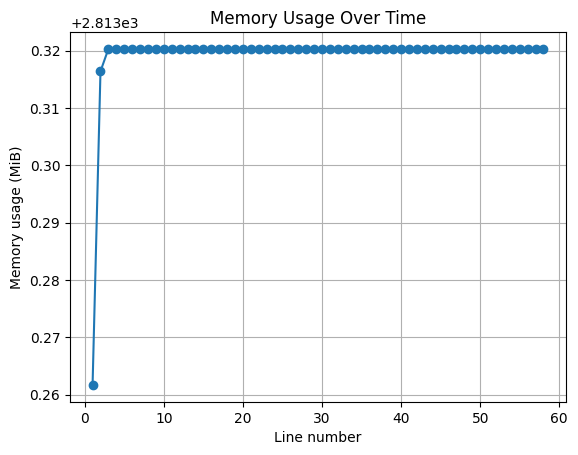

In [9]:
from q3_memory import q3_memory
memory_usage = memory_profiler.memory_usage((q3_memory, (), {'file_path': file_path}))
x_values = list(range(1, len(memory_usage) + 1))  
# Plot the memory usage over time
plot(x_values, memory_usage, 'Time' ,'Memory usage (MiB)', 'Memory Usage Over Time')

In [4]:
from q3_memory import q3_memory

with Profile() as profile:
    q3_memory(file_path)
    (
     Stats(profile)
     .strip_dirs()
     .sort_stats(SortKey.TIME)
     .print_stats()
    )

         6652998 function calls (6535412 primitive calls) in 7.484 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   117407    2.883    0.000    2.883    0.000 decoder.py:343(raw_decode)
   117408    0.778    0.000    0.923    0.000 {method 'readline' of '_io.TextIOWrapper' objects}
   117408    0.494    0.000    7.203    0.000 q3_memory.py:11(read_json)
   220810    0.336    0.000    1.312    0.000 jsonpath.py:585(_find_base)
   220810    0.285    0.000    0.566    0.000 jsonpath.py:554(get_field_datum)
   441620    0.248    0.000    0.349    0.000 jsonpath.py:102(__init__)
   117407    0.222    0.000    3.272    0.000 decoder.py:332(decode)
234814/117407    0.222    0.000    2.286    0.000 jsonpath.py:261(find)
   662430    0.208    0.000    0.335    0.000 jsonpath.py:95(wrap)
   234814    0.196    0.000    1.180    0.000 jsonpath.py:267(<listcomp>)
   117407    0.141    0.000    3.457    0.000 __init__.py:299(loads)
   

In [10]:
import json
import ujson
from io import StringIO
#jsonpath_expr = parse('$[*].mentionedUsers[*].username')
import orjson

def read_json():
    with open(file_path, 'r') as file:
        lines = file.readlines()
        data_json = '[' + ','.join(lines) + ']'
        return orjson.loads(data_json)

        
def run_exec():
    
    items = read_json()
    #print(items)
    
with Profile() as profile:
    run_exec()
    (
    Stats(profile).strip_dirs().sort_stats(SortKey.TIME).print_stats()
    )

         135598 function calls in 5.083 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    3.546    3.546    3.580    3.580 {orjson.loads}
        1    0.849    0.849    0.998    0.998 {method 'readlines' of '_io._IOBase' objects}
        1    0.248    0.248    0.248    0.248 {method 'join' of 'str' objects}
        1    0.218    0.218    5.044    5.044 3184208036.py:7(read_json)
    49772    0.102    0.000    0.102    0.000 {built-in method _codecs.utf_8_decode}
    49772    0.047    0.000    0.149    0.000 codecs.py:319(decode)
        1    0.039    0.039    5.083    5.083 3184208036.py:14(run_exec)
     3276    0.013    0.000    0.034    0.000 ipkernel.py:775(_clean_thread_parent_frames)
     1638    0.007    0.000    0.012    0.000 ipkernel.py:790(<setcomp>)
     1638    0.007    0.000    0.008    0.000 threading.py:1478(enumerate)
    14742    0.006    0.000    0.006    0.000 threading.py:1145(ident)
     655

In [2]:
from q3_time import q3_time

with Profile() as profile:
    q3_time(file_path)
    (
     Stats(profile)
     .strip_dirs()
     .sort_stats(SortKey.TIME)
     .print_stats()
    )

         4853566 function calls (4853019 primitive calls) in 11.854 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    5.321    5.321    5.359    5.359 {built-in method ujson.loads}
   441621    2.386    0.000    2.522    0.000 jsonpath.py:102(__init__)
    38035    1.011    0.000    1.845    0.000 jsonpath.py:749(<listcomp>)
        3    0.951    0.317    1.108    0.369 {method 'readlines' of '_io._IOBase' objects}
   220810    0.249    0.000    2.535    0.000 jsonpath.py:585(_find_base)
   220810    0.244    0.000    2.081    0.000 jsonpath.py:554(get_field_datum)
        1    0.233    0.233    6.884    6.884 q3_time.py:11(read_json)
        4    0.198    0.050    4.832    1.208 jsonpath.py:267(<listcomp>)
      241    0.184    0.001    0.184    0.001 {method 'join' of 'str' objects}
   779838    0.145    0.000    0.193    0.000 jsonpath.py:95(wrap)
    49778    0.119    0.000    0.119    0.000 {built-in method 